In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import make_regression
import seaborn as sns

# Importing dataset

In [2]:
X , y , cof = make_regression( n_samples = 500 , n_features = 1 , bias = 4.2 , noise = 7.1 , coef = True )
print X.shape , y.shape , cof
'''
X is points
y is corresponding values
cof = w1
bias = w0
'''
# W is sometimes referred to as Q (theta)
#Always check shape while multiplying w and x its not that we will always take w transpose

(500, 1) (500,) 29.333277509792588


'\nX is points\ny is corresponding values\ncof = w1\nbias = w0\n'

# Plotting Data

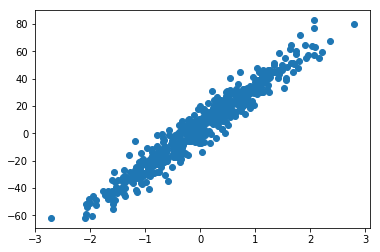

In [3]:
#setting limits
#plt.xlim(-200 , 200)
#plt.ylim(-200 , 200)
plt.scatter(X , y)

# Splitting Data

In [4]:
split = int(0.8 * X.shape[0])
#print split

X_train = X[:split]
print X_train.shape 
#print X_train

X_test = X[split:]
print X_test.shape

print '-'*20

y_train = y[:split]
print y_train.shape 
#print y_train

y_test = y[split:]
print y_test.shape

(400, 1)
(100, 1)
--------------------
(400,)
(100,)


# Functions ::--

In [5]:
#Hypothesis Function 
def hypothesis(x , W):
    return x*W[1] + W[0]

#Gradient Descent Function
#Updating Weights using grad_desc
def grad_descent(x , y , w , learning_rate = 0.1):
    error = get_error(x , y , w)
    [grad00 , grad01] = get_grads(x , y , w)
    
    #Wenedto update weights
    w[0] = w[0] - learning_rate*grad00
    w[1] = w[1] - learning_rate*grad01
    
    return error , w

#Error Function
def get_error(x , y , w):
    error = 0.0
    
    for i in range(x.shape[0]):
        
        error = error + (y[i] - hypothesis(x[i] , w))**2
    #Mean error
    error = error/(2*(x.shape[0]))#2 is multiplied for convienece in calculation cozwhen we take derivative 2 gets cancelled out
    return error

#Error Gradient
def get_grads(x , y , w):
    grad00 = 0.0
    grad01 = 0.0
    
    for i in range(x.shape[0]):
        grad00 = grad00 + (y[i] - hypothesis(x[i] , w))*(-1)#dl/dw0
        grad01 = grad01 + (y[i] - hypothesis(x[i] , w))*(-1*x[i])#dl/dw1
        
    #Meangrads
    
    grad00 = grad00/(x.shape[0])
    grad01 = grad01/(x.shape[0])
    
    return [grad00 , grad01]

In [6]:
W = np.array([0.1 , 0.1])#Initialising Weights with any value
loss = []

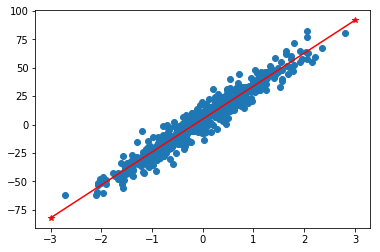

In [17]:
plt.scatter(X[: , 0] , y)

#We want to points to plot a line 

'''What we are doing is that updating first fixing thw value of W in this case we have taken [0.1 , 0.1] and 
after that we are updating W
what we predict is y = x*W[1] +w[0]
and we imprive our predicted value by changing W or updating W

'''
#here we are using just 2points to draw. line where x ranges from -3 to 3
y0 = hypothesis(-3 , W)
y1 = hypothesis(3 , W)
#print W

plt.plot([-3 , 3] , [y0 , y1] , 'r*-')
plt.show()

l , W = grad_descent(X_train , y_train , W , learning_rate = 0.5)
loss.append(l)

#print loss

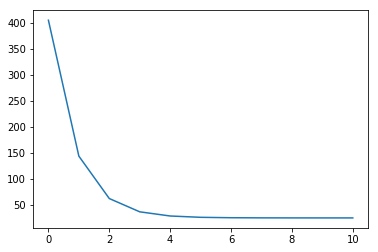

In [18]:
plt.plot(loss)
plt.show()

In [28]:
print W

ysum = 0
Ysum = 0
for i in range(X_test.shape[0]):
    pred = hypothesis(X_test[i] , W)
    if pred < 0:
        pred = pred * (-1)
    ysum = ysum + pred
print ysum

for y in range(y_test.shape[0]):
    actual = y_test[y]
    if actual < 0:
        actual = actual * (-1)
    Ysum = Ysum + actual
print Ysum

'''if ysum > Ysum:
    acc = (ysum/Ysum) * 100
else:
    acc = (Ysum/ysum) * 100

print acc'''
acc = (ysum/Ysum) * 100
print acc

[ 4.80581206 29.05843177]
[2219.2967886]
2306.948096433525
[96.20055137]


# Linear Regression using  SK-Learn Model

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(X_train , y_train)

/usr/local/lib/python2.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
lr.score(X_test , y_test)

0.9328193755500025